In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Mapping rgb to yuv color space
def rgb2yuv(images_rbg):
    rgb2yuv_matrix = np.array([[0.299, 0.587, 0.114], [-0.1473, -0.28886, 0.436],[0.615, -0.51499, 0.10001]])
    return(np.tensordot(images_rbg, rgb2yuv_matrix, axes=([3], [1])))

In [3]:
# Normalizing the values so that they have a mean of 0 and standard deviation of 1
def normalize_image(images):
    
    
    # Get the YUV columns
    y_col = images[:,:,:,0]
    u_col = images[:,:,:,1]
    v_col = images[:,:,:,2]
    
    # Find the mean and sd
    y_mean = np.mean(y_col)
    u_mean = np.mean(u_col)
    v_mean = np.mean(v_col)
    y_sd = np.sqrt(np.var(y_col))
    u_sd = np.sqrt(np.var(u_col))
    v_sd = np.sqrt(np.var(v_col))
    
    #     print("y_mean, u_mean, v_mean before normalization")
    #     print(y_mean, u_mean, v_mean)
    
    #     print("y_sd, u_sd, v_sd before normalization")
    #     print(y_sd, u_sd, v_sd)
    
    images[:,:,:,0] = (images[:,:,:,0] - y_mean)/y_sd
    images[:,:,:,1] = (images[:,:,:,1] - u_mean)/u_sd
    images[:,:,:,2] = (images[:,:,:,2] - v_mean)/v_sd
    
    # Get the YUV columns
    y_col = images[:,:,:,0]
    u_col = images[:,:,:,1]
    v_col = images[:,:,:,2]
    
    # Find the mean and sd
    y_mean = np.mean(y_col)
    u_mean = np.mean(u_col)
    v_mean = np.mean(v_col)
    y_sd = np.sqrt(np.var(y_col))
    u_sd = np.sqrt(np.var(u_col))
    v_sd = np.sqrt(np.var(v_col))
    
    #     print("y_mean, u_mean, v_mean after normalization")
    #     print(y_mean, u_mean, v_mean)
    
    #     print("y_sd, u_sd, v_sd after normalization")
    #     print(y_sd, u_sd, v_sd)
    return(images)


In [4]:
def preprocess_image(images):
    return normalize_image(rgb2yuv(images))    

In [58]:
# First lets read in the data
df = pd.read_csv('driving_log.csv')
df

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_10_19_17_11_497.jpg,IMG/left_2016_12_10_19_17_11_497.jpg,IMG/right_2016_12_10_19_17_11_497.jpg,0.000000,0.000000,0,0.419201
1,IMG/center_2016_12_10_19_17_11_597.jpg,IMG/left_2016_12_10_19_17_11_597.jpg,IMG/right_2016_12_10_19_17_11_597.jpg,0.000000,0.000000,0,0.414994
2,IMG/center_2016_12_10_19_17_11_700.jpg,IMG/left_2016_12_10_19_17_11_700.jpg,IMG/right_2016_12_10_19_17_11_700.jpg,0.000000,0.000000,0,0.410002
3,IMG/center_2016_12_10_19_17_11_809.jpg,IMG/left_2016_12_10_19_17_11_809.jpg,IMG/right_2016_12_10_19_17_11_809.jpg,0.000000,0.000000,0,0.405888
4,IMG/center_2016_12_10_19_17_11_910.jpg,IMG/left_2016_12_10_19_17_11_910.jpg,IMG/right_2016_12_10_19_17_11_910.jpg,0.000000,0.000000,0,0.001089
5,IMG/center_2016_12_10_19_17_12_012.jpg,IMG/left_2016_12_10_19_17_12_012.jpg,IMG/right_2016_12_10_19_17_12_012.jpg,0.000000,0.000000,0,0.001222
6,IMG/center_2016_12_10_19_17_12_116.jpg,IMG/left_2016_12_10_19_17_12_116.jpg,IMG/right_2016_12_10_19_17_12_116.jpg,0.000000,0.000000,0,0.000675
7,IMG/center_2016_12_10_19_17_12_227.jpg,IMG/left_2016_12_10_19_17_12_227.jpg,IMG/right_2016_12_10_19_17_12_227.jpg,0.000000,0.000000,0,0.000178
8,IMG/center_2016_12_10_19_17_12_327.jpg,IMG/left_2016_12_10_19_17_12_327.jpg,IMG/right_2016_12_10_19_17_12_327.jpg,0.000000,0.000000,0,0.000083
9,IMG/center_2016_12_10_19_17_12_430.jpg,IMG/left_2016_12_10_19_17_12_430.jpg,IMG/right_2016_12_10_19_17_12_430.jpg,0.000000,0.000000,0,0.000092


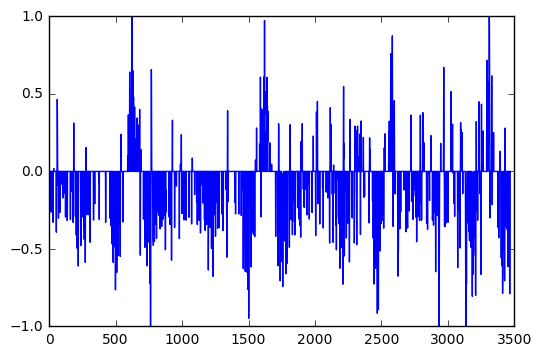

In [59]:
# See the distribution of steering angles
def plot_histogram(y, label):
    fig = plt.figure()
    plt.hist(y, bins=100, label=label)
    plt.legend()
    plt.title("Histogram of steering angles")
    plt.show()

steering_angles = df.steering.values
plt.plot(steering_angles)

In [7]:
# # Remove the data points that are 0
# df = df[df.steering != 0]
# print(df.shape)

(3675, 7)


In [60]:
# Positive is turning right, negative is turning left

# For the left camera
# If the car is turning right (assuming there is an obstacle on the left) then we need to turn right more since it's closer
# If the car is turning left (assuming there is an obstacle on the right) then we need to turn left less since it's further away

# For the right camera
# If the car is turning right, then we need to turn right less since obstacle (which is on the left) is furthest from right camera
# If the car is turning left, then we need to turn left more since obstacle (which is on the right) is closest to right camera
# First separate data by cameras
center_df = df.loc[:,['center','steering','throttle','brake','speed']]
left_df = df.loc[:, ['left','steering','throttle','brake','speed']]
right_df = df.loc[:, ['right','steering','throttle','brake','speed']]

def left_camera_alter(steering, delta):
    if steering > 0:
        if steering + (steering * delta) >= 1:
            return 1
        else:
            return steering + (steering * delta)
    elif steering < 0:
        if steering + (steering * delta) >= 0:
            return 0
        else:
            return steering + (steering * delta)
    else:
        return steering

def right_camera_alter(steering, delta):
    if steering > 0:
        if steering - (steering * delta) <= 0:
            return 0
        else:
            return steering - (steering * delta)
    elif steering < 0:
        if steering - (steering * delta) <= -1:
            return -1
        else:
            return steering - (steering * delta)
    else:
        return steering
   

In [61]:
print(left_df[left_df['steering'] > 0].shape)
print(left_df[left_df['steering'] < 0].shape)
print(right_df[right_df['steering'] > 0].shape)
print(right_df[right_df['steering'] < 0].shape)

(255, 5)
(814, 5)
(255, 5)
(814, 5)


In [62]:

print(left_df[left_df['steering'] >= 0.5].shape)
print(left_df[left_df['steering'] <= -0.5].shape)
print(right_df[right_df['steering'] >= 0.5].shape)
print(right_df[right_df['steering'] <= -0.5].shape)

(32, 5)
(89, 5)
(32, 5)
(89, 5)


In [63]:
# Rename the columns
left_df.columns = ['verbose_image_name', 'steering', 'throttle','brake','speed']
right_df.columns = ['verbose_image_name', 'steering', 'throttle','brake','speed']
center_df.columns = ['verbose_image_name', 'steering', 'throttle','brake','speed']

In [64]:
all_frames = [center_df, left_df, right_df]
df = pd.concat(all_frames)
df

,verbose_image_name,steering,throttle,brake,speed
0,IMG/center_2016_12_10_19_17_11_497.jpg,0.000000,0.000000,0,0.419201
1,IMG/center_2016_12_10_19_17_11_597.jpg,0.000000,0.000000,0,0.414994
2,IMG/center_2016_12_10_19_17_11_700.jpg,0.000000,0.000000,0,0.410002
3,IMG/center_2016_12_10_19_17_11_809.jpg,0.000000,0.000000,0,0.405888
4,IMG/center_2016_12_10_19_17_11_910.jpg,0.000000,0.000000,0,0.001089
5,IMG/center_2016_12_10_19_17_12_012.jpg,0.000000,0.000000,0,0.001222
6,IMG/center_2016_12_10_19_17_12_116.jpg,0.000000,0.000000,0,0.000675
7,IMG/center_2016_12_10_19_17_12_227.jpg,0.000000,0.000000,0,0.000178
8,IMG/center_2016_12_10_19_17_12_327.jpg,0.000000,0.000000,0,0.000083
9,IMG/center_2016_12_10_19_17_12_430.jpg,0.000000,0.000000,0,0.000092


In [65]:
# Get rid of the IMG/ at the start of the name
def get_image_name(image_name):
    print(image_name)
    return image_name.split('/')[1]
df['image_name'] = df['verbose_image_name'].apply(get_image_name)
del df['verbose_image_name']

IMG/center_2016_12_10_19_17_11_497.jpg
IMG/center_2016_12_10_19_17_11_597.jpg
IMG/center_2016_12_10_19_17_11_700.jpg
IMG/center_2016_12_10_19_17_11_809.jpg
IMG/center_2016_12_10_19_17_11_910.jpg
IMG/center_2016_12_10_19_17_12_012.jpg
IMG/center_2016_12_10_19_17_12_116.jpg
IMG/center_2016_12_10_19_17_12_227.jpg
IMG/center_2016_12_10_19_17_12_327.jpg
IMG/center_2016_12_10_19_17_12_430.jpg
IMG/center_2016_12_10_19_17_12_543.jpg
IMG/center_2016_12_10_19_17_12_647.jpg
IMG/center_2016_12_10_19_17_12_759.jpg
IMG/center_2016_12_10_19_17_12_875.jpg
IMG/center_2016_12_10_19_17_12_992.jpg
IMG/center_2016_12_10_19_17_13_094.jpg
IMG/center_2016_12_10_19_17_13_200.jpg
IMG/center_2016_12_10_19_17_13_310.jpg
IMG/center_2016_12_10_19_17_13_420.jpg
IMG/center_2016_12_10_19_17_13_522.jpg
IMG/center_2016_12_10_19_17_13_625.jpg
IMG/center_2016_12_10_19_17_13_730.jpg
IMG/center_2016_12_10_19_17_13_833.jpg
IMG/center_2016_12_10_19_17_13_945.jpg
IMG/center_2016_12_10_19_17_14_053.jpg
IMG/center_2016_12_10_19_

In [66]:
# Get the image names from the folder and our data frame
IMAGE_FOLDER_NAME = "IMG"
image_names_from_df = df.values[:,4]

In [67]:
# Get the paths of the images 
image_paths = [IMAGE_FOLDER_NAME + "/" + image_name.split(".")[0] + ".jpg" for image_name in image_names_from_df]

In [68]:
def resize_image(image_data):
    width, height = image_data.shape[1], image_data.shape[0]
    resized_width, resized_height = int(width/2), int(height/2)
    image = Image.fromarray(image_data)
    image = image.resize((resized_width, resized_height), Image.ANTIALIAS)
    return(np.asarray(image))
    

In [69]:
# Get the data
y = df.values[:,0]
X = []

for image_path in image_paths:
    image_data = mpimg.imread(image_path)
    X.append(resize_image(image_data))

In [70]:
# Cast X into a numpy array
X = np.array(X)

In [71]:
# Now that we have our data lets split it into a test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2)

In [72]:
print(X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape)

(6664, 80, 160, 3) (1666, 80, 160, 3) (2083, 80, 160, 3) (6664,) (1666,) (2083,)


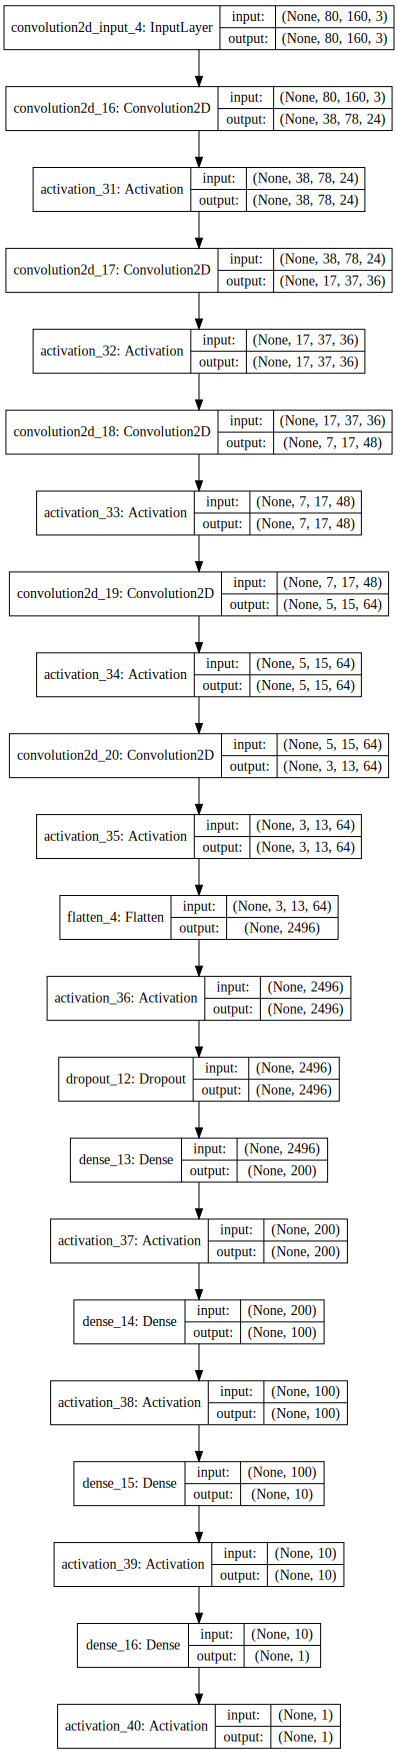

In [73]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling2D
from keras.activations import relu, softmax
from IPython.display import SVG, display
# from keras.utils.visualize_util import model_to_dot
import keras

# Now define the model
model = Sequential()
          
# 80 x 160 x 3 -> 38 x 77 x 24
model.add(Convolution2D(24, 5, 5, border_mode = "valid", subsample = (2,2), input_shape = (80,160,3)))
# model.add(Convolution2D(24, 5, 5, border_mode = "valid", input_shape = (80,160,3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# 38 x 77 x 24 -> 17 x 37 x 36
model.add(Convolution2D(36, 5, 5, border_mode = "valid", subsample = (2,2)))
# model.add(Convolution2D(36, 5, 5, border_mode = "valid"))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# 17 x 37 x 36 -> 7 x 17 x 48
model.add(Convolution2D(48, 5, 5, border_mode = "valid", subsample = (2,2)))
# model.add(Convolution2D(48, 5, 5, border_mode = "valid"))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))


# 7 x 17 x 48 -> 5 x 15 x 64
model.add(Convolution2D(64, 3, 3, border_mode = "valid", subsample = (1,1)))
model.add(Activation('relu'))

# 5 x 15 x 64 -> 3 x 13 x 64
model.add(Convolution2D(64, 3, 3, border_mode = "valid", subsample = (1,1)))
model.add(Activation('relu'))

# 3 x 13 x 64 -> 2496
model.add(Flatten(input_shape = (3, 13, 64)))

# Now use fully connected layers 
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))

# Add the output layer
model.add(Dense(1, init = 'normal'))
model.add(Activation('tanh'))

# Define the optimizer
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(loss = 'mean_squared_error', optimizer = adam)

# Show the model
# display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

In [84]:
# # Jessica model
# model = Sequential()
# model.add(Convolution2D(160, 3, 3, border_mode='same',
#                         input_shape=(80,160,3)))
# model.add(Activation('relu'))
# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Convolution2D(64, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))

# # Compile model
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error',
#               optimizer=sgd,
#               metrics=['accuracy'])

In [85]:
# Define the hyperparameteres for training
BATCH_SIZE = 50
NB_EPOCH = 10
from sklearn.utils import shuffle

# Define the generator
def my_generator(X, y, batch_size):
#     print(X_train.shape[0])
#     X_train, y_train = shuffle(X_train, y_train)
    start = 0
    end = start + batch_size
    n_samples = X.shape[0]
    
    while True: 
        X_batch = preprocess_image(X[start:end])
        y_batch = y[start:end]
        start = end
        end = end + batch_size
        if start >= n_samples:
            X, y = shuffle(X, y)
            start = 0
            end = start + batch_size
        yield X_batch, y_batch

In [ ]:
# Train the model
model.fit_generator(my_generator(X_train, y_train, BATCH_SIZE), samples_per_epoch = X_train.shape[0], nb_epoch = NB_EPOCH, validation_data = (preprocess_image(X_validation), y_validation))

Epoch 1/10
6664/6664 [==============================] - 1687s - loss: 0.0532 - acc: 0.6774 - val_loss: 0.0282 - val_acc: 0.7065

In [33]:
# # Try it with learning rate schedule
# from keras.callbacks import LearningRateScheduler
# import math
# # learning rate schedule
# def step_decay(epoch):
#     initial_lrate = 0.001
#     drop = 0.5
#     epochs_drop = 2
#     lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
#     return lrate

# # learning schedule callback
# lrate = LearningRateScheduler(step_decay)
# callbacks_list = [lrate]

# model.fit_generator(my_generator(X_train, y_train, BATCH_SIZE), \
#                     samples_per_epoch = X_train.shape[0], nb_epoch = NB_EPOCH, \
#                     validation_data = (X_validation, y_validation), \
#                    callbacks = callbacks_list) 

Epoch 1/6
15428/15428 [==============================] - 191s - loss: 0.0126 - val_loss: 1.0116

In [76]:
# Now evaluate on our test set 
loss = model.evaluate(preprocess_image(X_test), y_test)
print(loss)

2083/2083 [==============================] - 8s     

In [77]:
# Now save the model
from keras.models import load_model
model.save_weights("model.h5")

In [78]:
model_json = model.to_json()
with open('model.json', 'w') as outfile:
    outfile.write(model_json)

In [36]:
X_test.shape

(2205, 80, 160, 3)